## 零、定义问题

### 1.1 数据介绍

### http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names

   ＃属性域   
   
   -  -----------------------------------------   
   
   1.示例代码号码  
   
   2.块厚度1  -  10  
   
   3.细胞大小的一致性1  -  10  
   
   4.电池形状的均匀性1  -  10  
   
   5.边缘附着力1  -  10  
   
   6.单个上皮细胞大小1  -  10  
   
   7.裸核1  -  10  
   
   8.平淡的染色质1  -  10  
   
   9.正常核仁1  -  10  
   
  10.有丝分裂1  -  10  
  
  11.分类：（2为良性，4为恶性）  


### 1.2 问题定义

#### &nbsp;&nbsp;&nbsp; &nbsp;这是一个乳腺癌的数据集，主要通过训练来分出是否患有乳腺癌

## 一、导入数据

### &nbsp;&nbsp;&nbsp; &nbsp;1.1 导入类库

In [2]:
# 导入类库
from pandas import read_csv
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #要注意的是一旦导入了seaborn，matplotlib的默认作图风格就会被覆盖成seaborn的格式
%matplotlib notebook

### &nbsp;&nbsp;&nbsp; &nbsp;1.2 导入数据集

   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

In [3]:
# 导入数据
breast_cancer_data =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',header=None
                               ,names = ['C_D','C_T','U_C_Si','U_C_Sh','M_A','S_E_C_S'
                                        ,'B_N','B_C','N_N','M','Class'])


## 二、数据概述

### &nbsp;&nbsp;&nbsp; &nbsp;2.1 查看数据维度

In [4]:
#显示数据维度
print (breast_cancer_data.shape)

(699, 11)


### &nbsp;&nbsp;&nbsp; &nbsp;2.2 查看数据

In [5]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
C_D        699 non-null int64
C_T        699 non-null int64
U_C_Si     699 non-null int64
U_C_Sh     699 non-null int64
M_A        699 non-null int64
S_E_C_S    699 non-null int64
B_N        699 non-null object
B_C        699 non-null int64
N_N        699 non-null int64
M          699 non-null int64
Class      699 non-null int64
dtypes: int64(10), object(1)
memory usage: 57.4+ KB


In [6]:
breast_cancer_data.head(25)  # 这里注意id 1057013 的B_N为空值，用？代替。

,C_D,C_T,U_C_Si,U_C_Sh,M_A,S_E_C_S,B_N,B_C,N_N,M,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### &nbsp;&nbsp;&nbsp; &nbsp;2.2 数据统计描述

In [8]:
print(breast_cancer_data.describe())

                C_D         C_T      U_C_Si      U_C_Sh         M_A  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

          S_E_C_S         B_C         N_N           M       Class  
count  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.437768    2.866953    1.589413    2.689557  
std      2.214300    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      2.000000   

### &nbsp;&nbsp;&nbsp; &nbsp;2.2 数据分布情况

In [9]:
print(breast_cancer_data.groupby('Class').size())

Class
2    458
4    241
dtype: int64


### &nbsp;&nbsp;&nbsp; &nbsp;2.3 缺失数据处理

In [11]:
mean_value = breast_cancer_data[breast_cancer_data["B_N"] != "?"]["B_N"].astype(np.int).mean() # 计算异常值列的平均值

In [12]:
breast_cancer_data = breast_cancer_data.replace('?',mean_value) # na替换？

In [13]:
breast_cancer_data["B_N"] = breast_cancer_data["B_N"].astype(np.int64)

## 三、数据可视化

### 3.1单变量图表

<IPython.core.display.Javascript object>


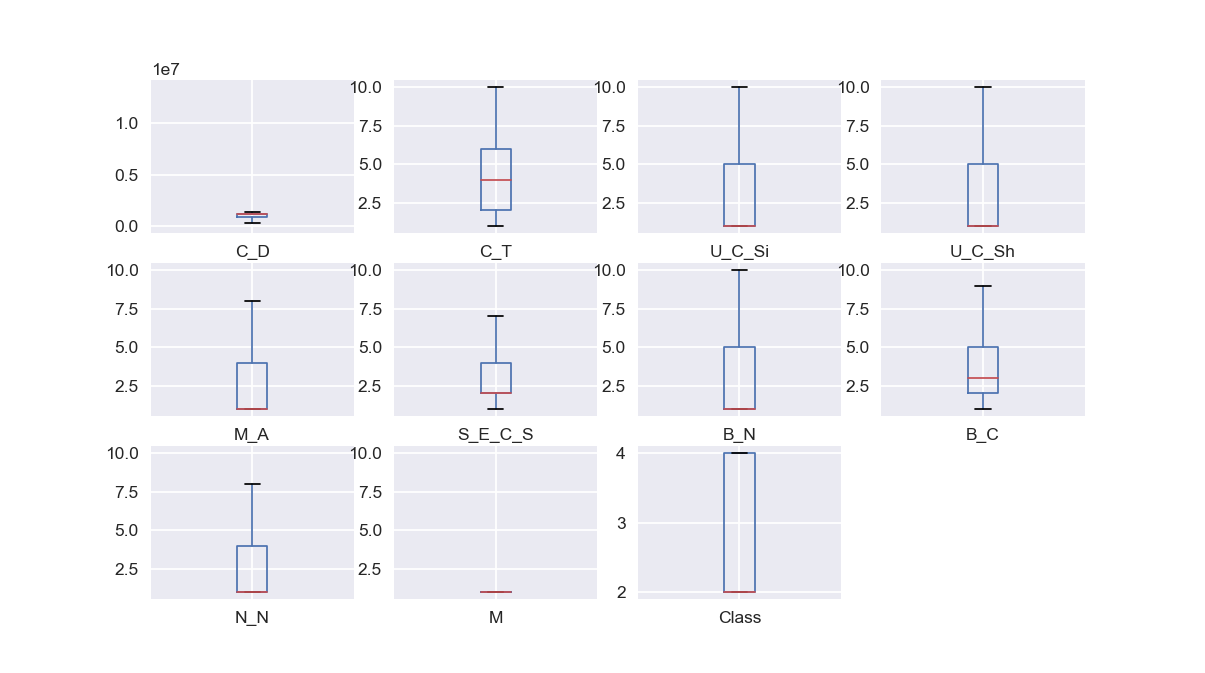

In [16]:
# 箱线图
breast_cancer_data.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
pyplot.show()

<IPython.core.display.Javascript object>


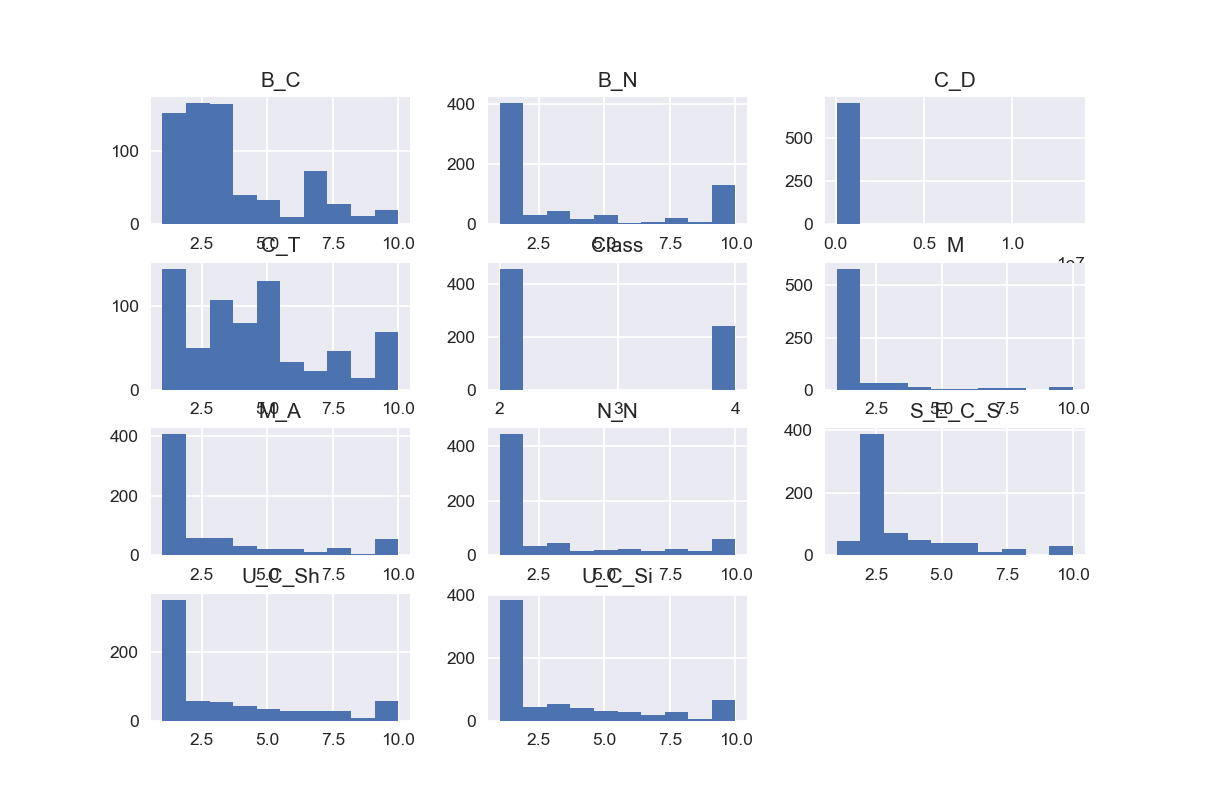

In [17]:
# 直方图
breast_cancer_data.hist()
pyplot.show()

### 3.1多变量图表

<IPython.core.display.Javascript object>


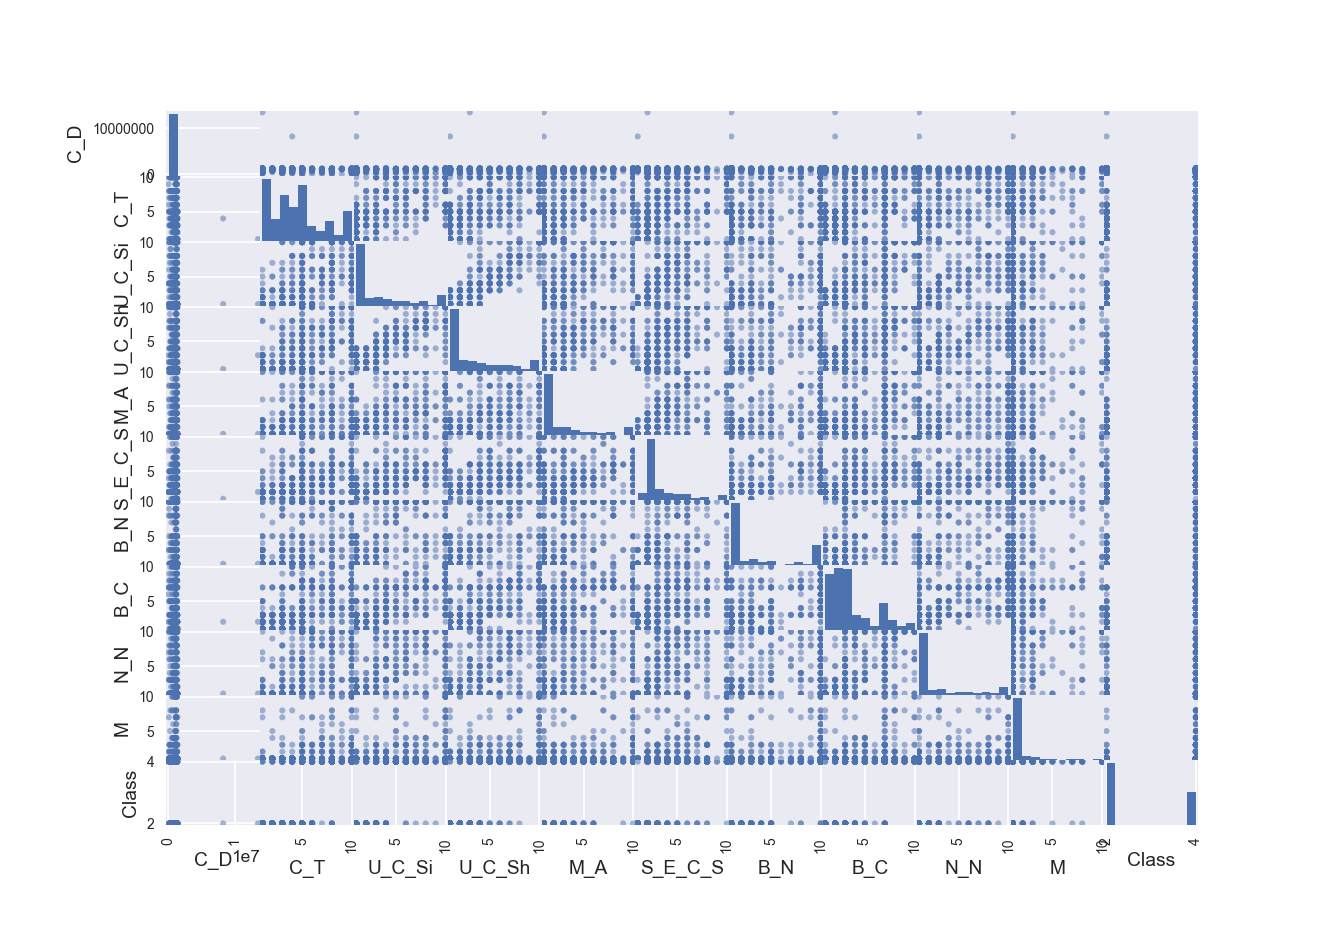

In [19]:
# 散点矩阵图
scatter_matrix(breast_cancer_data)
pyplot.show()

## 四、评估算法

### &nbsp;&nbsp;&nbsp; &nbsp; 4.1分离数据集

In [52]:
# 分离数据集
array = breast_cancer_data.values
X = array[:, 1:9] # C_D为编号，与Y无相关性，过滤掉
Y = array[:, 10]


validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### &nbsp;&nbsp;&nbsp; &nbsp; 4.2评估算法

KNN: 0.973 (0.018)
LDA: 0.959 (0.030)
SVM: 0.953 (0.036)
NB: 0.962 (0.031)
CART: 0.941 (0.033)
LR: 0.961 (0.026)


<IPython.core.display.Javascript object>


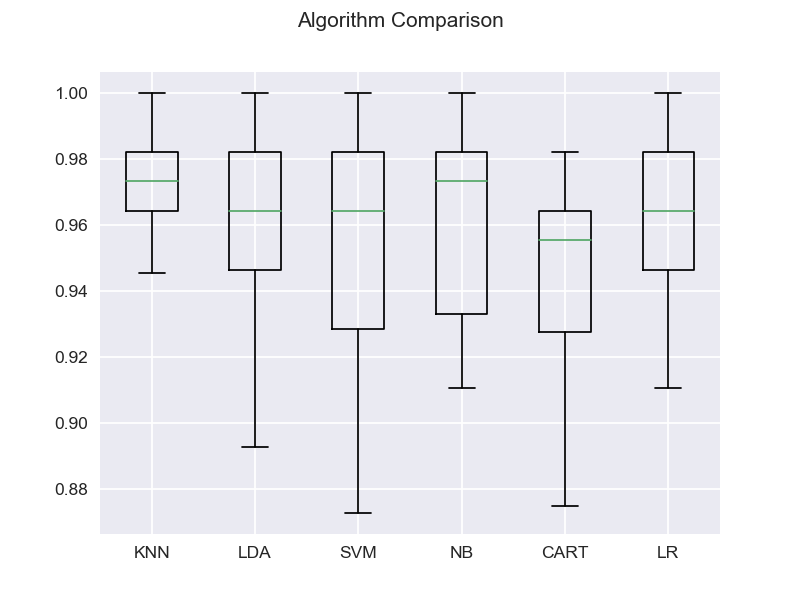

In [55]:
# 算法审查
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()

num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
# 评估算法
results = []
for name in models:
    result = cross_val_score(models[name], X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(result)
    msg = '%s: %.3f (%.3f)' % (name, result.mean(), result.std())
    print(msg)
    
# 图表显示
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

## 五、实施预测

In [75]:
#使用评估数据集评估算法
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.971428571429
[[89  2]
 [ 2 47]]
             precision    recall  f1-score   support

          2       0.98      0.98      0.98        91
          4       0.96      0.96      0.96        49

avg / total       0.97      0.97      0.97       140



## 六、git与参考

### git ：https://coding.net/u/RuoYun/p/Python-of-machine-learning/git/tree/master
### 参考：https://read.douban.com/column/6939417/